In [36]:
import numpy as np
import pandas as pd
import shap
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from package import function
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Xtrain = pd.read_csv("Xtrain.csv")
ytrain = pd.read_csv("ytrain.csv").cardio
Xtest = pd.read_csv("Xtest.csv")
ytest = pd.read_csv("ytest.csv").cardio

In [3]:
clf = DecisionTreeClassifier(random_state = 0)
rfc = RandomForestClassifier(random_state = 0)
clf = clf.fit(Xtrain,ytrain)
rfc = rfc.fit(Xtrain,ytrain)
score_c = clf.score(Xtest,ytest)
score_r = rfc.score(Xtest,ytest)

print("Single Tree: {}".format(score_c),"Random Forest: {}".format(score_r))


Single Tree: 0.6304761904761905 Random Forest: 0.7154761904761905


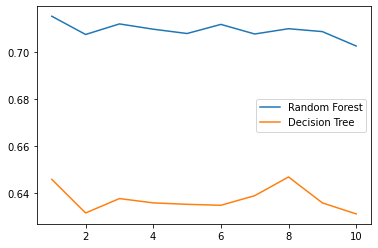

In [4]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,Xtrain,ytrain,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,Xtrain,ytrain,cv=10)

plt.plot(range(1,11),rfc_s, label = "Random Forest")
plt.plot(range(1,11),clf_s, label = "Decision Tree")
plt.legend()
plt.show()

0.7158571428571427 171


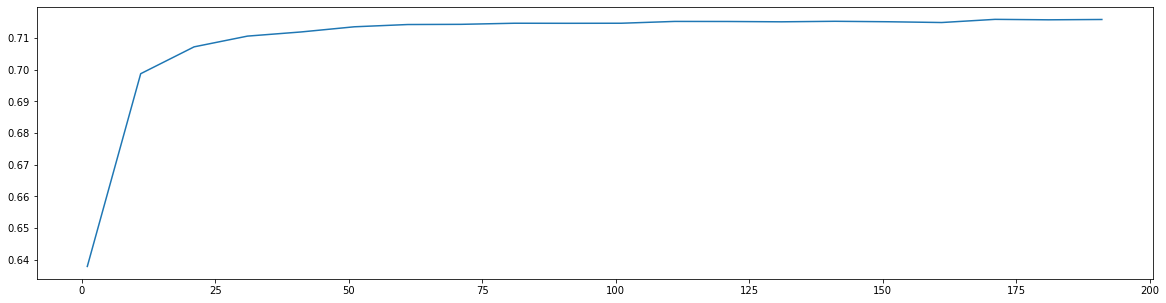

In [5]:
#调整n_estimator

scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators = i + 1, n_jobs = -1, random_state = 90)
    score = cross_val_score(rfc,Xtrain,ytrain,cv=10).mean()
    scorel.append(score)
    
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize = [20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

0.7156530612244898 166


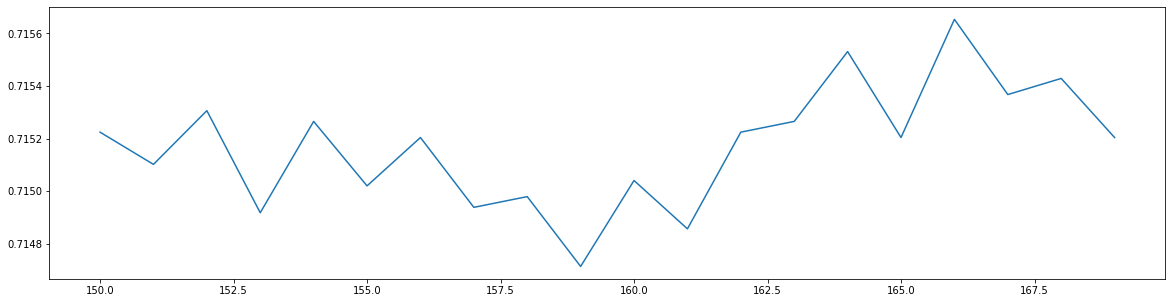

In [6]:
#细化学习曲线

scorel = []
for i in range(150,170):
    rfc = RandomForestClassifier(n_estimators = i, n_jobs = -1, random_state = 90)
    score = cross_val_score(rfc,Xtrain,ytrain,cv=10).mean()
    scorel.append(score)
    
print(max(scorel),([*range(150,170)][scorel.index(max(scorel))]))
plt.figure(figsize = [20,5])
plt.plot(range(150,170),scorel)
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV

#调整max_depth(结果：max_depth:11)
param_grid = {'max_depth':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators = 166, n_jobs = -1, random_state = 90)
GS = GridSearchCV(rfc, param_grid,cv = 10)
GS.fit(Xtrain,ytrain)


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=166, n_jobs=-1,
                                              random_state=90),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [8]:
GS.best_params_


{'max_depth': 11}

In [9]:
GS.best_score_

0.7361428571428571

In [10]:
Xtrain.shape

(49000, 11)

In [12]:
#调整max_feature(结果：max_feature:5)
from sklearn.model_selection import GridSearchCV
param_grid = {'max_features':np.arange(3,11,1)}
rfc = RandomForestClassifier(n_estimators = 166, n_jobs = -1, random_state = 90, max_depth = 11)
GS = GridSearchCV(rfc, param_grid,cv = 10)
GS.fit(Xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=11, n_estimators=166,
                                              n_jobs=-1, random_state=90),
             param_grid={'max_features': array([ 3,  4,  5,  6,  7,  8,  9, 10])})

In [13]:
GS.best_params_

{'max_features': 3}

In [14]:
GS.best_score_

0.7361428571428571

In [15]:
#调整min_samples_leaf(结果：默认)
param_grid = {'min_samples_leaf':np.arange(1,1+10,1)}
rfc = RandomForestClassifier(n_estimators = 166, random_state = 90, max_depth = 11,max_features = 5, n_jobs = -1)
GS = GridSearchCV(rfc, param_grid,cv = 10)
GS.fit(Xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=11, max_features=5,
                                              n_estimators=166, n_jobs=-1,
                                              random_state=90),
             param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])})

In [16]:
GS.best_score_

0.7359183673469387

In [17]:
GS.best_params_

{'min_samples_leaf': 7}

In [18]:
#调整min_samples_split(结果：默认)
param_grid = {'min_samples_split':np.arange(2,2+20,1)}
rfc = RandomForestClassifier(n_estimators = 166, random_state = 90, max_depth = 11,max_features = 5, n_jobs = -1)
GS = GridSearchCV(rfc, param_grid,cv = 10)
GS.fit(Xtrain,ytrain)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=11, max_features=5,
                                              n_estimators=166, n_jobs=-1,
                                              random_state=90),
             param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])})

In [19]:
GS.best_score_

0.7362244897959183

In [20]:
GS.best_params_

{'min_samples_split': 4}

The score is 0.735095 for Random Forest final


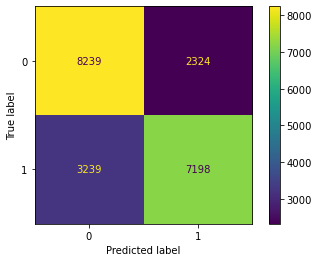

In [38]:
rfc = RandomForestClassifier(n_estimators = 166, random_state = 90, max_depth = 11,max_features = 5, n_jobs = -1)
rfc.fit(Xtrain,ytrain)
y_pred = rfc.predict(Xtest)
probTest = rfc.predict_proba(Xtest)
probTest = probTest[:,1]
function.eval_confusion("Random Forest final",rfc.score(Xtest,ytest),y_pred,ytest)

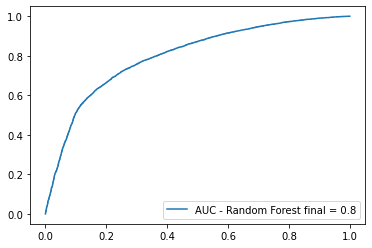

In [39]:
function.eval_auc("Random Forest final",ytest,probTest)

In [40]:
rfc.feature_importances_

array([0.16684421, 0.04556123, 0.06594049, 0.43693508, 0.16381201,
       0.00673311, 0.07630436, 0.01439028, 0.00621605, 0.00489998,
       0.01236318])

In [41]:
explainer = shap.TreeExplainer(rfc)
shap_values = explainer.shap_values(Xtest)

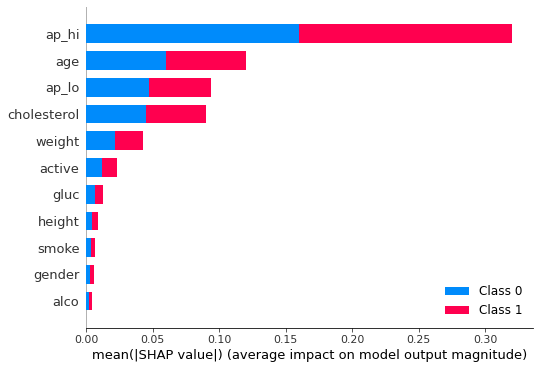

In [42]:
shap.summary_plot(shap_values, Xtest, plot_type="bar")